<a href="https://colab.research.google.com/github/Raghava-1845/NNDL-6/blob/main/double.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow numpy matplotlib


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

def create_double_digit_dataset(images, labels, num_samples=60000):
    X = []
    y1 = []
    y2 = []

    for _ in range(num_samples):
        i, j = np.random.randint(0, len(images), 2)

        img1 = images[i]
        img2 = images[j]

        # Concatenate images side by side (28x56)
        double_img = np.concatenate((img1, img2), axis=1)

        X.append(double_img)
        y1.append(labels[i])
        y2.append(labels[j])

    X = np.array(X) / 255.0
    X = X[..., np.newaxis]  # (28, 56, 1)

    return X, np.array(y1), np.array(y2)

# Create train and test sets
X_train, y1_train, y2_train = create_double_digit_dataset(x_train, y_train, 60000)
X_test, y1_test, y2_test = create_double_digit_dataset(x_test, y_test, 10000)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

input_layer = Input(shape=(28, 56, 1))

x = Conv2D(32, (3,3), activation='relu')(input_layer)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu')(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

# Two outputs (one per digit)
digit1 = Dense(10, activation='softmax', name='digit1')(x)
digit2 = Dense(10, activation='softmax', name='digit2')(x)

model = Model(inputs=input_layer, outputs=[digit1, digit2])


In [7]:
model.compile(
    optimizer='adam',
    loss={
        'digit1': 'sparse_categorical_crossentropy',
        'digit2': 'sparse_categorical_crossentropy'
    },
    metrics={
        'digit1': 'accuracy',
        'digit2': 'accuracy'
    }
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
Predicted digits: 1 0
Actual digits: 9 0


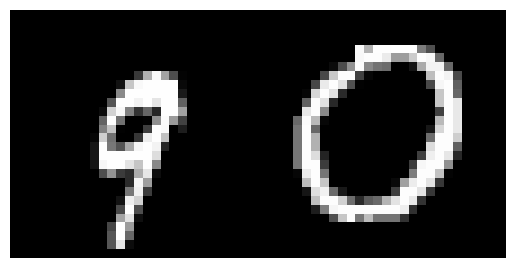

In [5]:
import matplotlib.pyplot as plt

idx = np.random.randint(0, len(X_test))
image = X_test[idx]

pred1, pred2 = model.predict(image[np.newaxis, ...])

print("Predicted digits:", np.argmax(pred1), np.argmax(pred2))
print("Actual digits:", y1_test[idx], y2_test[idx])

plt.imshow(image.squeeze(), cmap='gray')
plt.axis('off')
plt.show()
